# Capstone Workbook 4: Initial Modelling 3 - Advanced Extended

In [178]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

In [121]:
# Import data 
airbnb_ldn = pd.read_csv('airbnb_ldn_pp.csv')

In [122]:
# drop 'Unnamed: 0'
airbnb_ldn = airbnb_ldn.drop(columns = 'Unnamed: 0')

In [123]:
# removing null rows for listing title, can delete block when redone in the data cleaning section:
airbnb_ldn.dropna(subset='Listing Title', inplace=True)

# reset index
airbnb_ldn.reset_index(inplace=True)

In [124]:
airbnb_ldn.shape

(32674, 49)

For this inital modelling, a linear regression model will be used. This model will determine the qualities of the various numerical columns in determining the target variable 'Annual Revenue LTM'.

In [125]:
num_cols = airbnb_ldn.select_dtypes(exclude='object')

In [126]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32674 entries, 0 to 32673
Data columns (total 42 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   index                                              32674 non-null  int64  
 1   Number of Reviews                                  32674 non-null  int64  
 2   Bedrooms                                           32674 non-null  float64
 3   Bathrooms                                          32674 non-null  int64  
 4   Max Guests                                         32674 non-null  int64  
 5   Airbnb Superhost                                   32674 non-null  int64  
 6   Cleaning Fee (Native)                              32674 non-null  float64
 7   Extra People Fee(Native)                           32674 non-null  float64
 8   Minimum Stay                                       32674 non-null  int64  
 9   Latitu

Now the dataframe has been imported and numerical variables separated, a few additional checks will be complete.

Null values in main columns have been dealt with in previous workbooks. Some null values were not addressed, these will be evaluated now.

In [127]:
num_cols.isnull().sum()

index                                                    0
Number of Reviews                                        0
Bedrooms                                                 0
Bathrooms                                                0
Max Guests                                               0
Airbnb Superhost                                         0
Cleaning Fee (Native)                                    0
Extra People Fee(Native)                                 0
Minimum Stay                                             0
Latitude                                                 0
Longitude                                                0
Overall Rating                                           0
Airbnb Communication Rating                              0
Airbnb Accuracy Rating                                   0
Airbnb Checkin Rating                                    0
Airbnb Location Rating                                   0
Airbnb Value Rating                                     

There is one column that contain null values, 'Host Listing Count'. This column will be dropped.

In [129]:
# drop specified column:
num_cols.drop(columns='Host Listing Count', inplace=True)

KeyError: "['Host Listing Count'] not found in axis"

In [130]:
# confirm whether there are any null values left in the dataframe:
num_cols.isnull().any().any()

False

Now it is confirmed that there are no null values in the dataframe. The different numerical columns will be evaluated. Those that do not serve any semantic value when predicting the target column will be dropped.

In [131]:
# View numerical columns:
num_cols.head().T

,0,1,2,3,4
index,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Number of Reviews,9.000000e+00,1.100000e+01,1.000000e+00,2.000000e+01,0.000000e+00
Bedrooms,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00
Bathrooms,2.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
Max Guests,6.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00
Airbnb Superhost,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Cleaning Fee (Native),1.548000e+02,0.000000e+00,0.000000e+00,3.480000e+01,0.000000e+00
Extra People Fee(Native),0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00
Minimum Stay,3.000000e+00,1.000000e+00,7.000000e+00,5.000000e+00,5.000000e+00
Latitude,5.143105e+01,5.143399e+01,5.143500e+01,5.143531e+01,5.143532e+01


The columns identified as being semantically irrelevant are: 
- Latitude
- Longitude
- Airbnb Host ID	
- Number of Bookings LTM - Number of observed month	

These columns will be dropped from the dataframe:

In [132]:
num_cols.drop(columns = ['Latitude', 'Longitude', 'Airbnb Host ID', 'Number of Bookings LTM - Number of observed month'], inplace=True)

The dataframe will be split between the indepedent and target variables:

In [133]:
X = num_cols.drop(columns = 'Annual Revenue LTM (Native)')
y = num_cols['Annual Revenue LTM (Native)']

The data will now be split between the train and test sets:

In [134]:
# required imports 
from sklearn.model_selection import train_test_split

In [15]:
# split independent and target data between train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [16]:
# reset index for X train and test datasets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

The indexes must be reset for the y train and test datasets. This involves having to convert the series data into a dataframe for the conversation to occur, with the dataframe then being returned to a series format:

In [17]:
# reset index for y train and test datasets
# convert to dataframe
y_train = y_train.to_frame()
y_test = y_test.to_frame()

# reset index
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# return y datasets to series format
y_train = y_train.squeeze()
y_test = y_test.squeeze()

Now the dataframe has been split into train and test variables, the values of the train data will be further investigated.

In [18]:
X_train.head().T

,0,1,2,3,4
Number of Reviews,3.0,7.0,1.0,1.0,9.0
Bedrooms,2.0,1.0,1.0,2.0,1.0
Bathrooms,2.0,1.0,2.0,1.0,1.0
Max Guests,4.0,2.0,2.0,3.0,3.0
Airbnb Superhost,0.0,0.0,0.0,0.0,0.0
Cleaning Fee (Native),0.0,0.0,0.0,128.8,0.0
Extra People Fee(Native),0.0,0.0,0.0,0.0,0.0
Minimum Stay,5.0,1.0,3.0,28.0,3.0
Overall Rating,4.3,4.5,2.0,5.0,4.2
Airbnb Communication Rating,9.0,9.0,8.0,10.0,9.0


The numerical variable features are made up of continuous and binary columns (many binary columns resulting from the previous one-hot-encoding of categorical columns). For effective modelling, the continuous variable must be scaled. These columns will be identified, separated, scaled and then concatenated back onto the original dataframe:

In [19]:
# Isolate the binary columns
X_binary = X_train.columns[X_train.nunique() == 2]

In [20]:
# Create new dataframe by dropping the binary columns
X_cont = X_train.drop(columns = X_binary)

In [21]:
X_cont.head()

,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Cleaning Fee (Native),Extra People Fee(Native),Minimum Stay,Overall Rating,Airbnb Communication Rating,Airbnb Accuracy Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Average Daily Rate (Native)
0,3,2.0,2,4,0.0,0.0,5,4.3,9.0,8.0,9.0,9.0,7.0,20,345,2,12,1,312.8
1,7,1.0,1,2,0.0,0.0,1,4.5,9.0,9.0,9.0,9.0,9.0,246,119,44,21,22,134.3
2,1,1.0,2,2,0.0,0.0,3,2.0,8.0,4.0,6.0,6.0,4.0,90,275,58,77,3,41.1
3,1,2.0,1,3,128.8,0.0,28,5.0,10.0,10.0,10.0,10.0,10.0,15,350,2,16,0,109.8
4,9,1.0,1,3,0.0,0.0,3,4.2,9.0,8.0,10.0,10.0,8.0,29,336,13,56,0,266.2


As determined during the EDA phase, a log transformation for the continuous variables improves their correlation with the target variable and ensures the independent variables are more normally distributed.

In [22]:
# log transform the inpdendent variables, adding 1 to prevent the log of zero being taken 
X_log = np.log(X_cont + 1)

Now the log for the independent variables has been found, these same variables will be scaled to improve the modelling effectiveness when comparing the values to the binary columns:

In [170]:
# import scaling library
from sklearn.preprocessing import StandardScaler

In [24]:
# scale the X_log train dataframe
X_t_ls = StandardScaler().fit_transform(X_log)

In [25]:
# Conver the scaled array back into a dataframe
X_t_ls_df = pd.DataFrame(X_t_ls, columns = X_cont.columns)

# View the dataframe
X_t_ls_df

,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Cleaning Fee (Native),Extra People Fee(Native),Minimum Stay,Overall Rating,Airbnb Communication Rating,Airbnb Accuracy Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Average Daily Rate (Native)
0,-0.875262,0.790845,0.999983,0.573028,-0.852055,-0.447616,0.694414,-0.477114,-0.419676,-1.043335,-0.414672,-0.460973,-1.597114,-0.909443,0.647766,-1.894682,-3.373808,-1.038646,1.206369
1,-0.371674,-0.554543,-0.619103,-0.640334,-0.852055,-0.447616,-0.974305,-0.157545,-0.419676,-0.249048,-0.414672,-0.460973,-0.034372,0.930977,-0.639518,0.054457,-2.289124,0.806184,0.041670
2,-1.378850,-0.554543,0.999983,-0.640334,-0.852055,-0.447616,0.078540,-5.386908,-1.281060,-5.474510,-3.395127,-3.923641,-4.888692,0.185414,0.372988,0.249421,0.320391,-0.515076,-1.574623
3,-1.378850,0.790845,-0.619103,0.042996,1.659945,-0.447616,3.087549,0.593135,0.359542,0.469471,0.381761,0.464317,0.633114,-1.112485,0.665207,-1.894682,-2.820709,-1.562216,-0.234902
4,-0.209555,-0.554543,-0.619103,0.042996,-0.852055,-0.447616,0.078540,-0.641450,-0.419676,-1.043335,0.381761,0.464317,-0.772243,-0.643128,0.615727,-0.785935,-0.326299,-1.562216,0.983804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24500,2.282971,-0.554543,-0.619103,-0.640334,0.933845,2.608307,0.078540,0.300654,0.359542,0.469471,0.381761,0.464317,0.633114,-0.204250,0.525917,-0.126428,0.320391,-0.515076,-0.829770
24501,0.426494,-1.509111,0.999983,-0.640334,1.159144,-0.447616,-0.358430,-0.641450,-0.419676,-0.249048,-1.295088,-1.483833,-0.772243,0.777103,-0.245052,0.834448,0.372591,0.838332,0.358563
24502,0.363278,-0.554543,-0.619103,-0.640334,-0.852055,-0.447616,-0.974305,-0.157545,0.359542,-0.249048,0.381761,0.464317,-0.034372,0.986311,-0.849056,0.916211,0.037514,1.377476,-0.111837
24503,0.329480,-0.554543,-0.619103,0.573028,-0.852055,-0.447616,0.078540,-0.477114,-0.419676,-1.043335,-0.414672,0.464317,-0.772243,0.765874,-0.223279,0.704302,0.037514,0.097461,1.044129


The log transformed and scaled continuous variables must be concatenated back together with the binary variables.

In [26]:
# Create dataframe isolating the binary columns
X_binary_df = X_train[X_binary]

# Concatenate the continous and binary dataframes together:
X_train_ls = pd.concat([X_t_ls_df, X_binary_df], axis=1)

## Model 1: Linear Regression - X values log transformed

An initial linear regression model will be made. A cross validation will be used to instantly test the effectiveness of the model. 

In [175]:
# importing the required packages 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [150]:
# add constant to the X variables 
X_train_ls_withconstant = sm.add_constant(X_train_ls)

In [151]:
# 1. Instantiate the Model
linreg_cv_m1 = LinearRegression()

# 2. Fit the model using 5 folds 
scores_m1 = cross_val_score(linreg_cv_m1, X_train_ls_withconstant, y_train, cv=5)
print(scores_m1)

[0.60608209 0.59732934 0.6056655  0.60156209 0.60632729]


In [152]:
# determine the average score from the 5 folds 
print(f"The average R-squared score from the first cross-validation model is {round(scores_m1.mean(),2)}.")

The average R-squared score from the first cross-validation model is 0.6.


An initial result of 0.6 is a reasonably good result. 

## Model 2: Linear Regression Model - Standard X values

Not using a log transformation on the independent features.

In [31]:
# scale the standard x values:
X_t_s = StandardScaler().fit_transform(X_cont)

In [32]:
# Convert the scaled array back into a dataframe
X_t_s_df = pd.DataFrame(X_t_s, columns = X_cont.columns)

# View the dataframe
X_t_s_df

,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Cleaning Fee (Native),Extra People Fee(Native),Minimum Stay,Overall Rating,Airbnb Communication Rating,Airbnb Accuracy Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Average Daily Rate (Native)
0,-0.508597,0.564587,0.827039,0.338854,-0.586731,-0.320217,0.009655,-0.645657,-0.621889,-1.352239,-0.607766,-0.630806,-1.910232,-1.022679,1.022679,-1.041659,-2.356511,-0.629341,0.933355
1,-0.439779,-0.535585,-0.590998,-0.645920,-0.586731,-0.320217,-0.210598,-0.258029,-0.621889,-0.393175,-0.607766,-0.630806,-0.119892,1.239495,-1.239495,-0.466118,-2.003776,0.215879,-0.237796
2,-0.543005,-0.535585,0.827039,-0.645920,-0.586731,-0.320217,-0.100471,-5.103381,-1.676809,-5.188493,-3.811089,-4.185434,-4.595742,-0.322005,0.322005,-0.274271,0.191017,-0.548844,-0.849288
3,-0.543005,0.564587,-0.590998,-0.153533,2.485031,-0.320217,1.276113,0.711042,0.433032,0.565889,0.460008,0.554070,0.775278,-1.072727,1.072727,-1.041659,-2.199740,-0.669589,-0.398542
4,-0.405370,-0.535585,-0.590998,-0.153533,-0.586731,-0.320217,-0.100471,-0.839471,-0.621889,-1.352239,0.460008,0.554070,-1.015062,-0.932592,0.932592,-0.890922,-0.632031,-0.669589,0.627609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24500,4.738738,-0.535585,-0.590998,-0.645920,0.147821,2.206554,-0.100471,0.323414,0.433032,0.565889,0.460008,0.554070,0.775278,-0.692361,0.692361,-0.603151,0.191017,-0.548844,-0.652456
24501,-0.164509,-1.085670,0.827039,-0.645920,0.562795,-0.320217,-0.155535,-0.839471,-0.621889,-0.393175,-1.675541,-1.815682,-1.015062,0.779053,-0.779053,0.739778,0.269402,0.256127,-0.009471
24502,-0.198918,-0.535585,-0.590998,-0.645920,-0.586731,-0.320217,-0.210598,-0.258029,0.433032,-0.393175,0.460008,0.554070,-0.119892,1.429678,-1.429678,0.959032,-0.200911,1.262341,-0.330963
24503,-0.216122,-0.535585,-0.590998,0.338854,-0.586731,-0.320217,-0.100471,-0.645657,-0.621889,-1.352239,-0.607766,0.554070,-1.015062,0.749024,-0.749024,0.438304,-0.200911,-0.347601,0.705686


In [33]:
# Create dataframe isolating the binary columns
X_binary_df = X_train[X_binary]

# Concatenate the continous and binary dataframes together:
X_train_s = pd.concat([X_t_s_df, X_binary_df], axis=1)

In [34]:
X_train_s

,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Cleaning Fee (Native),Extra People Fee(Native),Minimum Stay,Overall Rating,Airbnb Communication Rating,Airbnb Accuracy Rating,...,Checkout Time_afternoon,Checkout Time_evening,Checkout Time_late,Checkout Time_morning,Checkout Time_none,Checkout Time_very_early,Listing Type_entire_home,Listing Type_hotel_room,Listing Type_private_room,Listing Type_shared_room
0,-0.508597,0.564587,0.827039,0.338854,-0.586731,-0.320217,0.009655,-0.645657,-0.621889,-1.352239,...,0,0,0,1,0,0,1,0,0,0
1,-0.439779,-0.535585,-0.590998,-0.645920,-0.586731,-0.320217,-0.210598,-0.258029,-0.621889,-0.393175,...,0,0,0,1,0,0,0,0,1,0
2,-0.543005,-0.535585,0.827039,-0.645920,-0.586731,-0.320217,-0.100471,-5.103381,-1.676809,-5.188493,...,0,0,0,1,0,0,0,0,1,0
3,-0.543005,0.564587,-0.590998,-0.153533,2.485031,-0.320217,1.276113,0.711042,0.433032,0.565889,...,1,0,0,0,0,0,1,0,0,0
4,-0.405370,-0.535585,-0.590998,-0.153533,-0.586731,-0.320217,-0.100471,-0.839471,-0.621889,-1.352239,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24500,4.738738,-0.535585,-0.590998,-0.645920,0.147821,2.206554,-0.100471,0.323414,0.433032,0.565889,...,0,0,0,1,0,0,0,0,1,0
24501,-0.164509,-1.085670,0.827039,-0.645920,0.562795,-0.320217,-0.155535,-0.839471,-0.621889,-0.393175,...,0,0,0,1,0,0,1,0,0,0
24502,-0.198918,-0.535585,-0.590998,-0.645920,-0.586731,-0.320217,-0.210598,-0.258029,0.433032,-0.393175,...,0,0,0,1,0,0,0,0,1,0
24503,-0.216122,-0.535585,-0.590998,0.338854,-0.586731,-0.320217,-0.100471,-0.645657,-0.621889,-1.352239,...,0,0,0,1,0,0,0,1,0,0


In [35]:
# add constant to the X variables 
X_train_s_withconstant = sm.add_constant(X_train_s)

In [36]:
from sklearn.metrics import make_scorer
# 1. Instantiate the Model
linreg_cv_m2 = LinearRegression()

# 2. Fit the model using 5 folds 
scores_m2 = cross_val_score(linreg_cv_m2, X_train_s_withconstant, y_train, cv=5)
print(scores_m2)

[0.71371649 0.68460297 0.67791408 0.70881657 0.66790542]


In [37]:
linreg_cv_m2.fit(X_train_s_withconstant, y_train)

LinearRegression()

In [38]:
print(f"The average R-squared score from the second cross-validation model is {round(scores_m2.mean(),2)}.")

The average R-squared score from the second cross-validation model is 0.69.


The model with the unlogged independent variables has performed better, with a R-squared value of approximately 70%; indicating that the 70% of the variance in the target column can be explained by the independent variables.

## Model 3: Lasso Model

Now that a successful initial linear regression model has been produced, a linear regression model using a L1 penalty will be complete. 

The purpose of this model is to aid in feature selection. The L1 penalty will alter the coefficients, and essentially bring the coefficients of non-influencial columns to zero; these columns can thus be dropped.

The same scaled X_train data used in model 2 can be used for this model:

In [144]:
# import lasso model
from sklearn.linear_model import Lasso

In [40]:
# 1. Instantiate the model
alpha = 0.1
max_iter = 10000
lasso = Lasso(alpha = alpha, max_iter = max_iter)

# 2. Fit the model
lasso.fit(X_train_s_withconstant, y_train)

# 3. Determine the model coefficients
lasso_coef = lasso.coef_
feature_names = X_train_s_withconstant.columns

coef_L1 = pd.DataFrame({'Features': feature_names, 'Coefficients': lasso_coef})
coef_L1

,Features,Coefficients
0,const,0.000000e+00
1,Number of Reviews,-1.387920e+03
2,Bedrooms,-2.049615e+02
3,Bathrooms,2.926665e+02
4,Max Guests,1.602147e+03
5,Cleaning Fee (Native),1.581563e+03
6,Extra People Fee(Native),-2.190477e+02
7,Minimum Stay,-1.563671e+02
8,Overall Rating,-9.823272e+00
9,Airbnb Communication Rating,1.163789e+02


The table above, shows the coefficient values that have resulted from the lasso (L1 penalty) linear regression model. These coefficients will be plotted on a bar chart, so that the most influencial columns can be more easily identified, as well as those with zero coefficients.

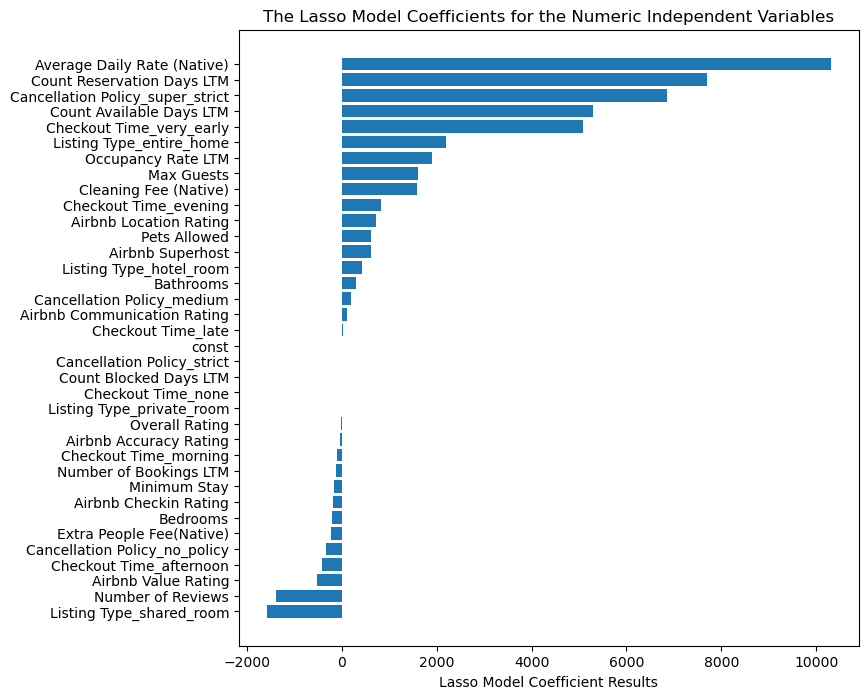

In [41]:
# create dataframe with the sorted coefficient values 
sort_coef = coef_L1.sort_values(by='Coefficients')

# plt the sorted values on a bar chart
plt.figure(figsize=(8, 8))
plt.barh(sort_coef['Features'], sort_coef['Coefficients'])
plt.xlabel('Lasso Model Coefficient Results')
plt.title('The Lasso Model Coefficients for the Numeric Independent Variables')
plt.show()

From the Lasso model, the column identified as having a coefficient value of zero is the 'Count Blocked Days LTM' (ignoring the 'const' column). Hence, this column will be dropped for future modelling. 

The columns with the highest absolute coefficients, which are the most influencial in determing the target variable can also be identified. Unsurprisingly, the 'Average Daily Rate (Native)' and 'Count Reservation Days LTM' have the two highest positive coefficients. It would make sense, that a property with a higher daily rate, or is occupied for a larger portion of a year, would make more money. 

Other columns coefficients which provide more valuable insights can also be found. Looking at the positive coefficients, having a 'super strict' cancellation policy looks to be influencial in increasing yearly revenue. There are two explanations for this, the first, a very strict policy will essentially reduce the quantity of cancellations, meaning the occurance of last minute cancellations and loss of tenants and thus income will be reduced. But also, when considering the types of properties, it could be suggested the more affluent, higher quality properties will naturally have a more strict cancellation policy. A property that is exclusive, expensive and in high demand, would be more likely to also have a stricter cancellation policy, and due to the high quality nature of the property will pull a substancial income. The question therefore, is whether a strict cancellation policy influences the yearly income, or whether the type of property that has high income due to its quality, is also more likely to have a strict cancellation policy. This can be explored further later on.

Other columns relate to the property types. **do more insights on this graph, can use some of these points during the presentation, good bits of initial information to talk about**

In [42]:
# drop the 'Count Blocked Days LTM' column:
X_train_s.drop(columns='Count Blocked Days LTM', inplace=True)

## Model 4: Decision Tree

A decision tree pipeline model will be used for the next modelling attempt. A grid search cross validation will be used, to optimise the various input parameters within the decision tree. 

Principle componant analysis (PCA) will be used. The numeric dataframe used in the model 2 and 3 will be used again; meaning the data does not need to be scaled within the decision tree pipeline.

In [153]:
# Additional required imports 

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline

# To try dimensionality reduction
from sklearn.decomposition import PCA

# import decision tree regressor
from sklearn.tree import DecisionTreeRegressor


# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV

In [154]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
estimators = [('reduce_dim', PCA()),
              ('dt', DecisionTreeRegressor(criterion='mse'))]
pipe = Pipeline(estimators, memory = cachedir)

### Decision Tree: Model 1

In [45]:
# params for DecisionTreeRegressor() : model 1
# max depth

n_pca = [2, 5, 10, 15, 20]

max_depth = [6, 8, 10, 12]

# min samples required for split
min_samples_split = [6, 8, 10, 12]

# min 
min_leaf = [1, 2, 3, 4, 6]

max_features = [2, 4, 6, 8]

# define the parameter grid
params = dict(
    reduce_dim__n_components = n_pca,
    dt__min_samples_split = min_samples_split,
    dt__min_samples_leaf = min_leaf,
    dt__max_depth = max_depth)

In [46]:
dt_gsCV = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1, verbose=5)
dt_gsCV.fit(X_train_s, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(memory='C:\\Users\\blcm9\\AppData\\Local\\Temp\\tmp456h2abx',
                                steps=[('reduce_dim', PCA()),
                                       ('dt', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [6, 8, 10, 12],
                         'dt__min_samples_leaf': [1, 2, 3, 4, 6],
                         'dt__min_samples_split': [6, 8, 10, 12],
                         'reduce_dim__n_components': [2, 5, 10, 15, 20]},
             verbose=5)

In [47]:
print(f"The decision tree model score on the entire train dataset is:{dt_gsCV.score(X_train_s, y_train)}.")
print(f"The decision tree model score based on the grid search cross-validation is {dt_gsCV.best_score_}.")

The decision tree model score on the entire train dataset is:0.9115394556242857.
The decision tree model score based on the grid search cross-validation is 0.7738847686614079.


In [48]:
# Determine the scores: 
print(f"The score from the entire training dataset is {dt_gsCV.score(X_train_s, y_train)}.")

The score from the entire training dataset is 0.9115394556242857.


In [49]:
dt_gsCV.best_score_

0.7738847686614079

In [50]:
dt_gsCV.best_estimator_.get_params()['dt']

DecisionTreeRegressor(max_depth=12, min_samples_leaf=6, min_samples_split=10)

Looking at the results from the first decision tree model. The model has scored an R-squared value of 0.95 when fitting to the entire train dataset. However, when evaluating the 'best score' based on the grid search cross validation, the returned score is 0.75. This indicates overfitting has occured, so the model hyperparameters will be altered to address this. This will be completed in the following model.

### Decision Tree: Model 2

In [155]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline
# The steps here act as placeholders and will be changed when we pass the pipeline into the grid search later
estimators = [('dt', DecisionTreeRegressor(criterion='mse'))]
pipe = Pipeline(estimators, memory = cachedir)

In [156]:
# params for DecisionTreeRegressor() : model 1
# max depth

max_depth = [4, 6, 8]

min_samples_split = [2, 4, 6]

# criterion
# min 
min_leaf = [4, 6, 8]

max_features = [2, 4, 6]

# define the parameter grid
params = dict(
    dt__min_samples_split = min_samples_split,
    dt__min_samples_leaf = min_leaf,
    dt__max_features = max_features,
    dt__max_depth = max_depth)

In [157]:
dt_gsCV = GridSearchCV(pipe, param_grid=params, cv=5, n_jobs=-1, verbose=5)
dt_gsCV.fit(X_train_s, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(memory='C:\\Users\\blcm9\\AppData\\Local\\Temp\\tmpen__397y',
                                steps=[('dt', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'dt__max_depth': [4, 6, 8],
                         'dt__max_features': [2, 4, 6],
                         'dt__min_samples_leaf': [4, 6, 8],
                         'dt__min_samples_split': [2, 4, 6]},
             verbose=5)

In [158]:
print(f"The decision tree model score on the entire train dataset is:{dt_gsCV.score(X_train_s, y_train)}.")
print(f"The decision tree model score based on the grid search cross-validation is {dt_gsCV.best_score_}.")

The decision tree model score on the entire train dataset is:0.8413772659657651.
The decision tree model score based on the grid search cross-validation is 0.8029188528948946.


In [159]:
dt_gsCV.best_estimator_.get_params()['dt']

DecisionTreeRegressor(max_depth=8, max_features=6, min_samples_leaf=4)

This second model is performing significantly better than the first. The score of 0.82 and best score of 0.81, indicates overfitting isn't occuring and the model accuracy is high.

## Completing a Model With the Processed Text Columns

Starting with the listing title column:

In [160]:
# import the listing title count vectorized column
lt_cv = pd.read_csv('lt_cv.csv')

# import the listing title tf-idf column:
lt_tfidf = pd.read_csv('lt_tfidf.csv')

Concatenate the text processed columns onto the main dataframe in two parts, so that there are two versions:

In [161]:
# concatenate the dataframes:
X_cv = pd.concat([X, lt_cv], axis=1)

X_tfidf = pd.concat([X, lt_tfidf], axis=1)

In [162]:
X_cv.drop(columns='index', inplace=True)
X_tfidf.drop(columns='index', inplace=True)

### Run a Linear Regression Model on the Concatenated Dataframe

Starting with the count vectorized dataframe, a train test split will be completed, using the same parameters as the previous split:

In [193]:
# split independent and target data between train and test sets:
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y, test_size = 0.25, random_state=42)

In [194]:
# reset index for X train and test datasets
X_train_cv.reset_index(drop=True, inplace=True)
X_test_cv.reset_index(drop=True, inplace=True)

In [195]:
# reset index for y train and test datasets
# convert to dataframe
y_train_cv = y_train.to_frame()
y_test_cv = y_test.to_frame()

# reset index
y_train_cv.reset_index(drop=True, inplace=True)
y_test_cv.reset_index(drop=True, inplace=True)

# return y datasets to series format
y_train_cv = y_train_cv.squeeze()
y_test_cv = y_test_cv.squeeze()

In [172]:
# Scale the X data:
X_train_cvs = StandardScaler().fit_transform(X_train_cv)
X_test_cvs = StandardScaler().fit_transform(X_test_cv)

In [174]:
# 1. Instantiate the model
alpha = 0.1
max_iter = 10000
lasso = Lasso(alpha = alpha, max_iter = max_iter)

# 2. Fit the model
lasso.fit(X_train_cvs, y_train_cv)

# 3. Determine the model coefficients
lasso_coef = lasso.coef_
feature_names = X_train_cv.columns

coef_L2 = pd.DataFrame({'Features': feature_names, 'Coefficients': lasso_coef})
coef_L2

,Features,Coefficients
0,Number of Reviews,-1402.563122
1,Bedrooms,168.951108
2,Bathrooms,395.823618
3,Max Guests,1520.659604
4,Airbnb Superhost,198.827990
...,...,...
769,wimbledon,-102.195669
770,wimbledon tennis,37.771978
771,wonderful,-71.995950
772,wood,-14.349173


In [176]:
coef_L2[coef_L2['Coefficients']==0]

,Features,Coefficients
23,Cancellation Policy_strict,-0.0
28,Checkout Time_morning,-0.0
79,arch,-0.0
266,earl court,0.0
351,greater london,-0.0
510,near canary wharf,0.0
585,pro managed,-0.0
643,single en suite,0.0


The columns identified as having no impact on predicting the target column has been identified. These columns can now be dropped:

In [191]:
X_train_cv

,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,Cleaning Fee (Native),Extra People Fee(Native),Minimum Stay,Overall Rating,Airbnb Communication Rating,...,westminster,wharf,wi,wi fi,wifi,wimbledon,wimbledon tennis,wonderful,wood,zone
0,3,2.0,2,4,0,0.0,0.0,5,4.3,9.0,...,0,0,0,0,0,0,0,0,0,0
1,7,1.0,1,2,0,0.0,0.0,1,4.5,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,2,2,0,0.0,0.0,3,2.0,8.0,...,0,0,0,0,0,0,0,0,0,0
3,1,2.0,1,3,0,128.8,0.0,28,5.0,10.0,...,0,0,0,0,0,0,0,0,0,0
4,9,1.0,1,3,0,0.0,0.0,3,4.2,9.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24500,308,1.0,1,2,0,30.8,20.6,3,4.8,10.0,...,0,0,0,0,0,0,0,0,0,0
24501,23,0.5,2,2,0,48.2,0.0,2,4.2,9.0,...,0,0,0,0,0,0,0,0,0,0
24502,21,1.0,1,2,0,0.0,0.0,1,4.5,10.0,...,0,0,0,0,0,0,0,0,0,0
24503,20,1.0,1,4,0,0.0,0.0,3,4.3,9.0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
X_train_cv.drop(columns = ['Cancellation Policy_strict', 'Checkout Time_morning', 'arch', 'earl court', 'greater london', 'near canary wharf', 'pro managed', 'single en suite'], inplace=True)

C:\Users\blcm9\AppData\Local\Temp\ipykernel_20496\3533982019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cv.drop(columns = ['Cancellation Policy_strict', 'Checkout Time_morning', 'arch', 'earl court', 'greater london', 'near canary wharf', 'pro managed', 'single en suite'], inplace=True)


In [197]:
X_test_cv.drop(columns = ['Cancellation Policy_strict', 'Checkout Time_morning', 'arch', 'earl court', 'greater london', 'near canary wharf', 'pro managed', 'single en suite'], inplace=True)

C:\Users\blcm9\AppData\Local\Temp\ipykernel_20496\767892729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cv.drop(columns = ['Cancellation Policy_strict', 'Checkout Time_morning', 'arch', 'earl court', 'greater london', 'near canary wharf', 'pro managed', 'single en suite'], inplace=True)


### Linear Regression Model: With Updated Text Data

A linear regression model will be run with the updated dataframe, having removed the columns identified in the Lasso model as being non-predictive of the target column: